In [368]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas.io.json import json_normalize
import json

In [369]:
movie_data = pd.read_csv("movie_data.csv")

movie_df = pd.DataFrame(movie_data)
movie_df.head()

,Unnamed: 0,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,metacritic,synopsis,cast
0,0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018,88.0,"T'Challa, heir to the hidden but advanced king...","Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
1,1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018,68.0,The Avengers and their allies must be willing ...,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa..."
2,2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018,80.0,The Incredibles hero family takes on a new mis...,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H..."
3,3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018,51.0,When the island's dormant volcano begins roari...,"Chris Pratt, Bryce Dallas Howard, Rafe Spall, ..."
4,4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018,66.0,Foul-mouthed mutant mercenary Wade Wilson (a.k...,"Ryan Reynolds, Josh Brolin, Morena Baccarin, J..."


In [370]:
movie_df.drop(["Genre_2", "Genre_3","synopsis"], axis=1)

,Unnamed: 0,Main_Genre,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,metacritic,cast
0,0,Action,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018,88.0,"Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
1,1,Action,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018,68.0,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa..."
2,2,Animation,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018,80.0,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H..."
3,3,Action,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018,51.0,"Chris Pratt, Bryce Dallas Howard, Rafe Spall, ..."
4,4,Action,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018,66.0,"Ryan Reynolds, Josh Brolin, Morena Baccarin, J..."
...,...,...,...,...,...,...,...,...,...,...,...,...
93,105,Animation,6.7,89,6,PG,Paramount Pictures,Madagascar: Escape 2 Africa,603900354.0,2008,61.0,"Ben Stiller, Chris Rock, David Schwimmer, Jada..."
94,106,Adventure,6.7,106,7,PG-13,Metro-Goldwyn-Mayer,Quantum of Solace,586090727.0,2008,58.0,"Daniel Craig, Olga Kurylenko, Mathieu Amalric,..."
95,107,Sci-Fi,7.9,126,8,PG-13,Paramount Pictures,Iron Man,585174222.0,2008,79.0,"Robert Downey Jr., Terrence Howard, Jeff Bridg..."
96,108,Animation,8.4,98,9,G,Pixar,WALL-E,521311860.0,2008,95.0,"Ben Burtt, Elissa Knight, Jeff Garlin, Fred Wi..."


In [371]:
print(movie_df["worldwide_gross"].mean())
print(movie_df["worldwide_gross"].median())
print(movie_df["worldwide_gross"].max())
print(movie_df["worldwide_gross"].min())

710110030.0306122
675894948.0
2749064328.0
315058289.0


In [372]:
# used if function to only run if it is not already a list

if type(movie_df["cast"][0]) != list:    
    movie_df["cast"] = movie_df["cast"].str.split(',').tolist()

In [373]:
# used explode function to separate each actor

cast_df = movie_df.explode("cast")
cast_df.head()

,Unnamed: 0,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,metacritic,synopsis,cast
0,0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018,88.0,"T'Challa, heir to the hidden but advanced king...",Chadwick Boseman
0,0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018,88.0,"T'Challa, heir to the hidden but advanced king...",Michael B. Jordan
0,0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018,88.0,"T'Challa, heir to the hidden but advanced king...",Lupita Nyong'o
0,0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018,88.0,"T'Challa, heir to the hidden but advanced king...",Danai Gurira
1,1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018,68.0,The Avengers and their allies must be willing ...,Robert Downey Jr.


In [374]:
# created summary of average sales, IMDB rating, and metacritc for the the films each actor was in

actor_averages = cast_df.groupby(["cast"])

actor_gross = ((actor_averages["worldwide_gross"].mean()) / 1000000).round()

actor_imdb_rating = ((actor_averages["imdb_rating"].mean()) * 10).round()

actor_metacritic = (actor_averages["metacritic"].mean()).round()

actor_films = actor_averages["title"].count()

films = actor_averages["title"]

actor_stats = pd.DataFrame({"Average Worldwide Gross Sales": actor_gross,
                             "Average IMDB Rating": actor_imdb_rating,
                             "Average Metacritic": actor_metacritic,
                             "Number of Films": actor_films,
                             "Films": films})

actor_stats

,Average Worldwide Gross Sales,Average IMDB Rating,Average Metacritic,Number of Films,Films
cast,,,,,
Aaron Eckhart,997.0,90.0,84.0,1,"( Aaron Eckhart, [The Dark Knight])"
Alain Chabat,877.0,67.0,49.0,1,"( Alain Chabat, [Ice Age: Continental Drift])"
Alan Rickman,1342.0,81.0,85.0,1,"( Alan Rickman, [Harry Potter and the Deathly ..."
Alan Tudyk,532.0,78.0,65.0,1,"( Alan Tudyk, [Rogue One: A Star Wars Story])"
Albert Brooks,486.0,73.0,77.0,1,"( Albert Brooks, [Finding Dory])"
...,...,...,...,...,...
Tom Hanks,775.0,76.0,70.0,2,"(Tom Hanks, [Toy Story 3, Angels & Demons])"
Tom Holland,334.0,75.0,73.0,1,"(Tom Holland, [Spider-Man: Homecoming])"
Vin Diesel,589.0,72.0,65.0,3,"(Vin Diesel, [Furious 7, Fast & Furious 6, Fas..."


In [415]:
# show the table with actors who were in more than 1 movie

top_actors = actor_stats.loc[actor_stats["Number of Films"] > 1, [
    "Average Worldwide Gross Sales", "Average IMDB Rating", "Average Metacritic", "Number of Films", "Films"]]
top_actors

,Average Worldwide Gross Sales,Average IMDB Rating,Average Metacritic,Number of Films,Films
cast,,,,,
Amy Adams,499.0,68.0,50.0,2,"( Amy Adams, [Batman v Superman: Dawn of Justi..."
Angelina Jolie,649.0,74.0,70.0,2,"( Angelina Jolie, [Kung Fu Panda 2, Kung Fu Pa..."
Billy Burke,707.0,48.0,49.0,3,"( Billy Burke, [The Twilight Saga: Breaking Da..."
Bryce Dallas Howard,535.0,66.0,55.0,2,"( Bryce Dallas Howard, [Jurassic World: Fallen..."
Cate Blanchett,551.0,70.0,70.0,2,"( Cate Blanchett, [Thor: Ragnarok, Indiana Jon..."
...,...,...,...,...,...
Shia LaBeouf,980.0,62.0,38.0,2,"(Shia LaBeouf, [Transformers: Dark of the Moon..."
Steve Carell,757.0,76.0,67.0,2,"(Steve Carell, [Despicable Me 2, Despicable Me])"
Tom Hanks,775.0,76.0,70.0,2,"(Tom Hanks, [Toy Story 3, Angels & Demons])"


In [416]:
# showed the top ten high grossing actors with more than 1 movie

top_actor_stats = top_actors.loc[top_actors["Average Worldwide Gross Sales"] > 976, [
    "Average Worldwide Gross Sales", "Number of Films", "Films"]]

In [417]:
# sorted table

sort_actors = top_actor_stats.sort_values(by=["Average Worldwide Gross Sales"], ascending=False)

sort_actors

,Average Worldwide Gross Sales,Number of Films,Films
cast,,,
Zoe Saldana,1304.0,3,"( Zoe Saldana, [Guardians of the Galaxy Vol. 2..."
Michael Gambon,1138.0,2,"( Michael Gambon, [Harry Potter and the Deathl..."
Christian Bale,1041.0,2,"(Christian Bale, [The Dark Knight Rises, The D..."
Johnny Depp,1036.0,2,"(Johnny Depp, [Pirates of the Caribbean: On St..."
Josh Duhamel,980.0,2,"( Josh Duhamel, [Transformers: Dark of the Moo..."
Shia LaBeouf,980.0,2,"(Shia LaBeouf, [Transformers: Dark of the Moon..."
Ken Stott,977.0,3,"( Ken Stott, [The Hobbit: The Battle of the Fi..."
Martin Freeman,977.0,3,"( Martin Freeman, [The Hobbit: The Battle of t..."
Richard Armitage,977.0,3,"( Richard Armitage, [The Hobbit: The Battle of..."


Text(0, 0.5, 'Gross Sales')

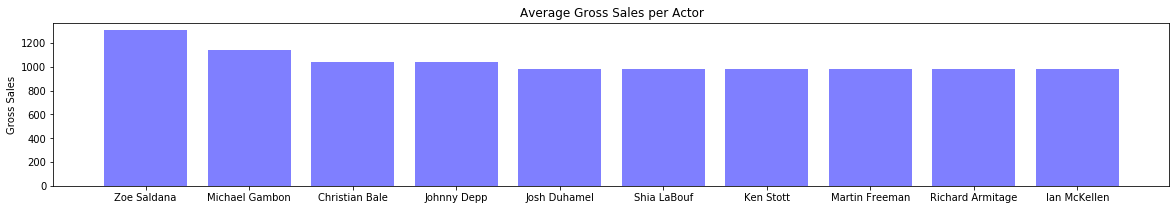

In [403]:
x_axis = np.arange(len(sort_actors))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, sort_actors["Average Worldwide Gross Sales"], color='b', alpha=0.5)
plt.xticks(tick_locations, ["Zoe Saldana", "Michael Gambon", "Christian Bale", "Johnny Depp", "Josh Duhamel", "Shia LaBouf", "Ken Stott", "Martin Freeman", "Richard Armitage", "Ian McKellen"])
plt.title("Average Gross Sales per Actor")
plt.ylabel("Gross Sales")

In [386]:
# Created tables for averages by studio

studio_averages = movie_df.groupby(["studio"])

average_gross = ((studio_averages["worldwide_gross"].mean()) / 1000000).round()

average_imdb_rating = ((studio_averages["imdb_rating"].mean()) * 10).round()

average_metacritic = (studio_averages["metacritic"].mean()).round()

number_films = studio_averages["title"].count()

studio_stats = pd.DataFrame({"Average Worldwide Gross Sales": average_gross,
                             "Average IMDB Rating": average_imdb_rating,
                             "Average Metacritic": average_metacritic,
                             "Number of Films": number_films})

studio_stats

,Average Worldwide Gross Sales,Average IMDB Rating,Average Metacritic,Number of Films
studio,,,,
20th Century Fox,950.0,76.0,67.0,7
Columbia Pictures,648.0,65.0,50.0,7
Lionsgate Films,751.0,60.0,58.0,7
Metro-Goldwyn-Mayer,847.0,72.0,70.0,2
Paramount Pictures,736.0,70.0,61.0,14
Pixar,554.0,82.0,89.0,4
Sony Pictures,369.0,72.0,66.0,2
Universal Pictures,566.0,69.0,61.0,10
Walt Disney Pictures,707.0,75.0,69.0,27


Text(0, 0.5, 'Gross Sales')

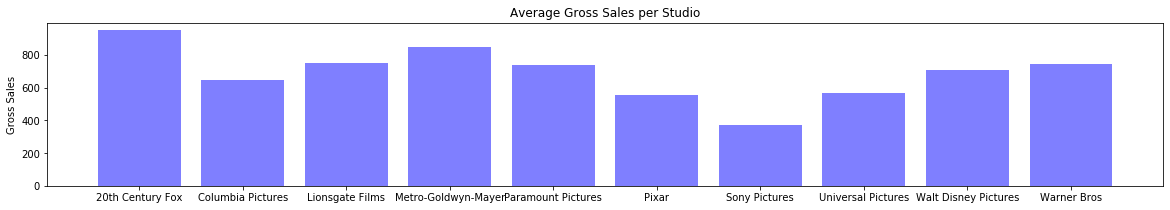

In [387]:
# bar chart for average gross sales by studio

x_axis = np.arange(len(studio_stats))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, studio_stats["Average Worldwide Gross Sales"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, ["20th Century Fox", "Columbia Pictures", "Lionsgate Films", "Metro-Goldwyn-Mayer", "Paramount Pictures","Pixar", "Sony Pictures", "Universal Pictures", "Walt Disney Pictures", "Warner Bros"])
plt.title("Average Gross Sales per Studio")
plt.ylabel("Gross Sales")


In [393]:
# Created tables for averages by title

title_averages = movie_df.groupby(["title"])

title_gross = ((title_averages["worldwide_gross"].mean()) / 1000000).round()

title_imdb_rating = ((title_averages["imdb_rating"].mean()) * 10).round()

title_metacritic = (title_averages["metacritic"].mean()).round()

title_stats = pd.DataFrame({"Worldwide Gross Sales": title_gross,
                             "Average IMDB Rating": title_imdb_rating,
                             "Average Metacritic": title_metacritic})

title_stats



,Worldwide Gross Sales,Average IMDB Rating,Average Metacritic
title,,,
2012,769.0,58.0,49.0
Alice in Wonderland,1025.0,65.0,53.0
Angels & Demons,486.0,67.0,48.0
Avatar,2749.0,79.0,83.0
Avengers: Age of Ultron,459.0,74.0,66.0
...,...,...,...
Up,731.0,83.0,88.0
WALL-E,521.0,84.0,95.0
Wonder Woman,413.0,75.0,76.0


In [395]:
top_title_stats = title_stats.loc[title_stats["Worldwide Gross Sales"] > 1062, [
    "Worldwide Gross Sales", "Average IMDB Rating", "Average Metacritic"]]

,Worldwide Gross Sales,Average IMDB Rating,Average Metacritic
title,,,
Avatar,2749.0,79.0,83.0
Frozen,1274.0,77.0,75.0
Harry Potter and the Deathly Hallows - Part 2,1342.0,81.0,85.0
Iron Man 3,1215.0,73.0,62.0
Skyfall,1109.0,78.0,81.0
The Avengers,1519.0,82.0,69.0
The Dark Knight Rises,1084.0,85.0,78.0
Toy Story 3,1063.0,84.0,92.0
Transformers: Age of Extinction,1091.0,58.0,32.0


In [418]:
sort_titles = top_title_stats.sort_values(by=["Worldwide Gross Sales"], ascending=False)

sort_titles

,Worldwide Gross Sales,Average IMDB Rating,Average Metacritic
title,,,
Avatar,2749.0,79.0,83.0
The Avengers,1519.0,82.0,69.0
Harry Potter and the Deathly Hallows - Part 2,1342.0,81.0,85.0
Frozen,1274.0,77.0,75.0
Iron Man 3,1215.0,73.0,62.0
Transformers: Dark of the Moon,1124.0,63.0,42.0
Skyfall,1109.0,78.0,81.0
Transformers: Age of Extinction,1091.0,58.0,32.0
The Dark Knight Rises,1084.0,85.0,78.0


Text(0, 0.5, 'Gross Sales')

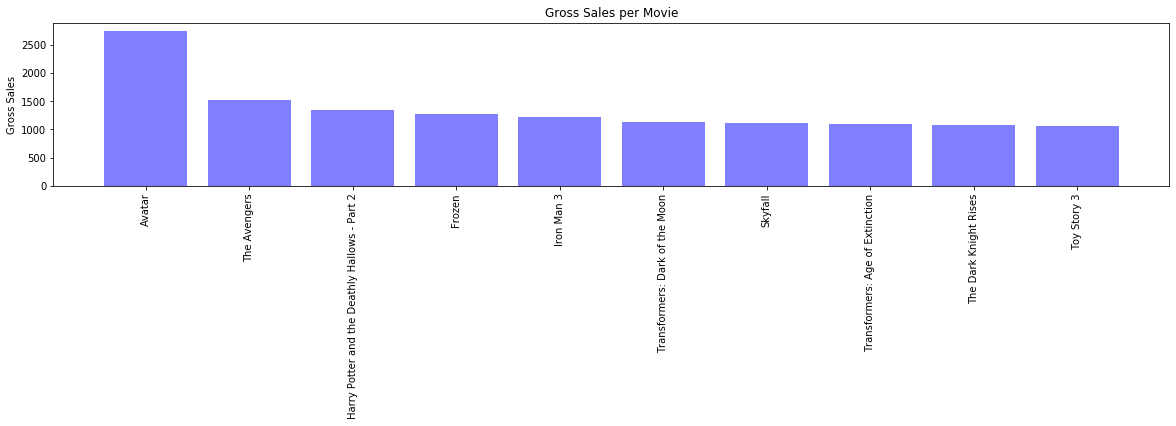

In [419]:
# bar chart for average gross sales by title

x_axis = np.arange(len(sort_titles))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, sort_titles["Worldwide Gross Sales"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, ["Avatar", "The Avengers", "Harry Potter and the Deathly Hallows - Part 2", "Frozen", "Iron Man 3", "Transformers: Dark of the Moon", "Skyfall", "Transformers: Age of Extinction", "The Dark Knight Rises", "Toy Story 3"], rotation="vertical")
plt.title("Gross Sales per Movie")
plt.ylabel("Gross Sales")